In [170]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from itertools import product
# from pandas import inline

Populating the interactive namespace from numpy and matplotlib


# Подготовка данных для ЗП РФ 1993-2020

In [374]:
d = pd.read_excel('zp.xlsx')
d.head(5)

D:\Programs\anaconda\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
D:\Programs\anaconda\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,янв,фев,март,апр,май,июнь,июль,авг,сен,окт,ноя,дек,year
0,0.308,0.294,0.337,0.373,0.438,0.493,0.541,0.548,0.613,0.703,0.839,1.195,1991
1,1.400,2.000,2.700,3.100,3.700,5.100,5.500,5.900,7.400,8.900,10.600,16.100,1992
2,15.300,19.100,23.600,30.600,37.500,47.400,56.000,65.400,80.900,93.000,101.500,141.200,1993
3,134.200,144.700,164.800,171.500,183.500,207.500,221.000,232.800,253.200,265.000,281.600,354.200,1994
4,302.600,321.000,361.500,386.200,429.900,480.600,499.500,520.600,564.500,594.500,615.700,735.500,1995


In [375]:
df = pd.DataFrame(columns = ['date', 'avg_sal'])

In [376]:
ind = pd.date_range('1991-01-01', periods=348, freq=pd.DateOffset(months=1))

In [377]:
df['date'] = ind
df.index = ind
df

,date,avg_sal
1991-01-01,1991-01-01,NaN
1991-02-01,1991-02-01,NaN
1991-03-01,1991-03-01,NaN
1991-04-01,1991-04-01,NaN
1991-05-01,1991-05-01,NaN
...,...,...
2019-08-01,2019-08-01,NaN
2019-09-01,2019-09-01,NaN
2019-10-01,2019-10-01,NaN
2019-11-01,2019-11-01,NaN


In [378]:
for el in range(len(d)):
    k = d['year'][el]
    df.loc[datetime(k,1,1),'avg_sal'] = d['янв'][el]
    df.loc[datetime(k,2,1),'avg_sal'] = d['фев'][el]
    df.loc[datetime(k,3,1),'avg_sal'] = d['март'][el]
    df.loc[datetime(k,4,1),'avg_sal'] = d['апр'][el]
    df.loc[datetime(k,5,1),'avg_sal'] = d['май'][el]
    df.loc[datetime(k,6,1),'avg_sal'] = d['июнь'][el]
    df.loc[datetime(k,7,1),'avg_sal'] = d['июль'][el]
    df.loc[datetime(k,8,1),'avg_sal'] = d['авг'][el]
    df.loc[datetime(k,9,1),'avg_sal'] = d['сен'][el]
    df.loc[datetime(k,10,1),'avg_sal'] = d['окт'][el]
    df.loc[datetime(k,11,1),'avg_sal'] = d['ноя'][el]
    df.loc[datetime(k,12,1),'avg_sal'] = d['дек'][el]

In [379]:
df.to_excel('avg_sal.xlsx')

In [380]:
df

,date,avg_sal
1991-01-01,1991-01-01,0.308
1991-02-01,1991-02-01,0.294
1991-03-01,1991-03-01,0.337
1991-04-01,1991-04-01,0.373
1991-05-01,1991-05-01,0.438
...,...,...
2019-08-01,2019-08-01,44961
2019-09-01,2019-09-01,45541
2019-10-01,2019-10-01,46549
2019-11-01,2019-11-01,46285


In [342]:
df = df[df['date'] > datetime(1992,12,1)]
df.set_index('date', inplace = True)

In [343]:
df.to_excel('zprf.xlsx')

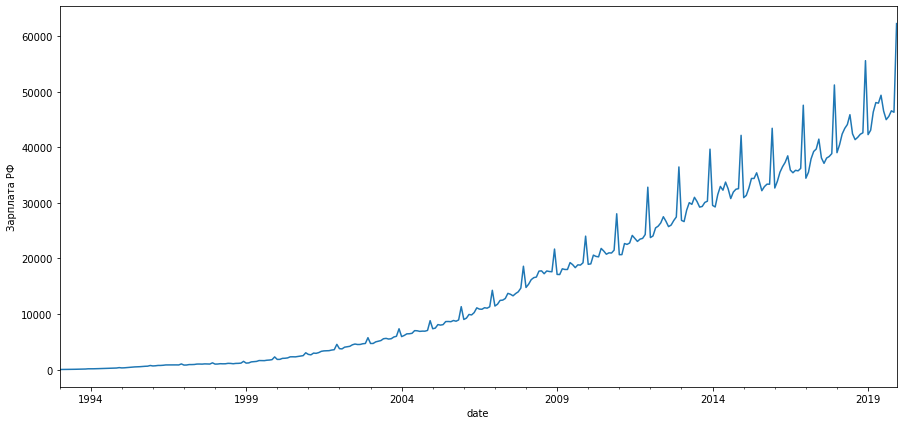

In [344]:
plt.figure(figsize=(15,7))
df['avg_sal'].plot()
plt.ylabel('Зарплата РФ')
pylab.show()

### У ряда виден явный тренд и наблюдается сезонность. Сезоны выпадают на декабрь месяц. Похоже, что надбавка к зп засчет годовых премий.

# Использование скользящего среднего по кварталу и году

In [345]:
def smooth_avg(data, size):
    arr = [0] * len(data)
    for i in range(len(data)):
        if(i < len(data) - size):
            for j in range(0,size):
                arr[i] = arr[i] + data[i + j]
            arr[i] = arr[i] / size
        if(i >= len(data) - size):
            for j in range(0,size):
                arr[i] = arr[i] + data[i - j]
            arr[i] = arr[i] / size
    return arr

In [346]:
warnings.filterwarnings('ignore')
df['avg_sal12'] = smooth_avg(df['avg_sal'], 12)
df['avg_sal4'] = smooth_avg(df['avg_sal'], 4)

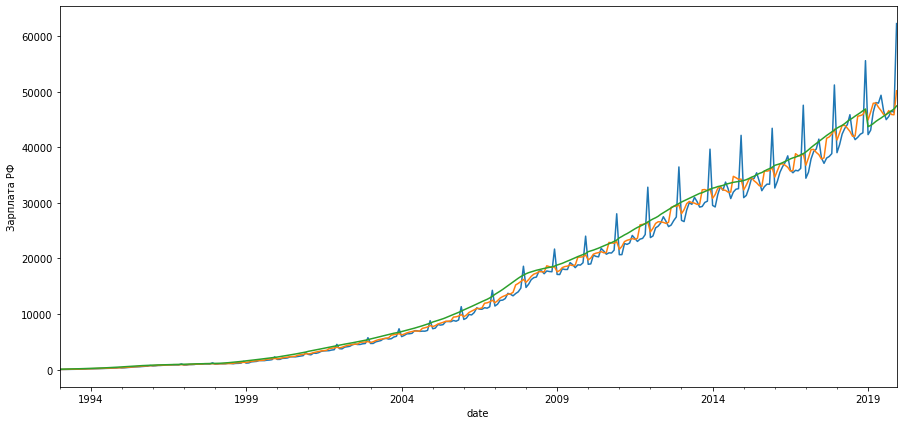

In [347]:
plt.figure(figsize=(15,7))
df['avg_sal'].plot(label = 'Зарплата РФ')
plt.ylabel('Зарплата РФ')
df['avg_sal4'].plot(label = 'Зарплата РФ квартал')
df['avg_sal12'].plot(label = 'Зарплата РФ год')
pylab.show()

### Наблюдаем смягчение ряда после сглаживания

In [348]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['avg_sal'])[1])
print(" Критерий Дики-Фуллера квартал: p=%f" % sm.tsa.stattools.adfuller(df['avg_sal4'])[1])
print(" Критерий Дики-Фуллера год: p=%f" % sm.tsa.stattools.adfuller(df['avg_sal12'])[1])

 Критерий Дики-Фуллера: p=0.998936
 Критерий Дики-Фуллера квартал: p=0.998785
 Критерий Дики-Фуллера год: p=1.000000


In [349]:
df.to_excel('newdf.xlsx')

# Анализ ряда и приведение к стационарности

In [350]:
df = pd.read_excel('newdf.xlsx', index_col = 'date')
df

,avg_sal,avg_sal12,avg_sal4
date,,,
1993-01-01,15.3,59.291667,22.150
1993-02-01,19.1,69.200000,27.700
1993-03-01,23.6,79.666667,34.775
1993-04-01,30.6,91.433333,42.875
1993-05-01,37.5,103.175000,51.575
...,...,...,...
2019-08-01,44961.0,45891.083333,45834.000
2019-09-01,45541.0,46205.000000,46589.750
2019-10-01,46549.0,46556.416667,45890.000


 Критерий Дики-Фуллера: p=0.998936


<Figure size 1080x720 with 0 Axes>

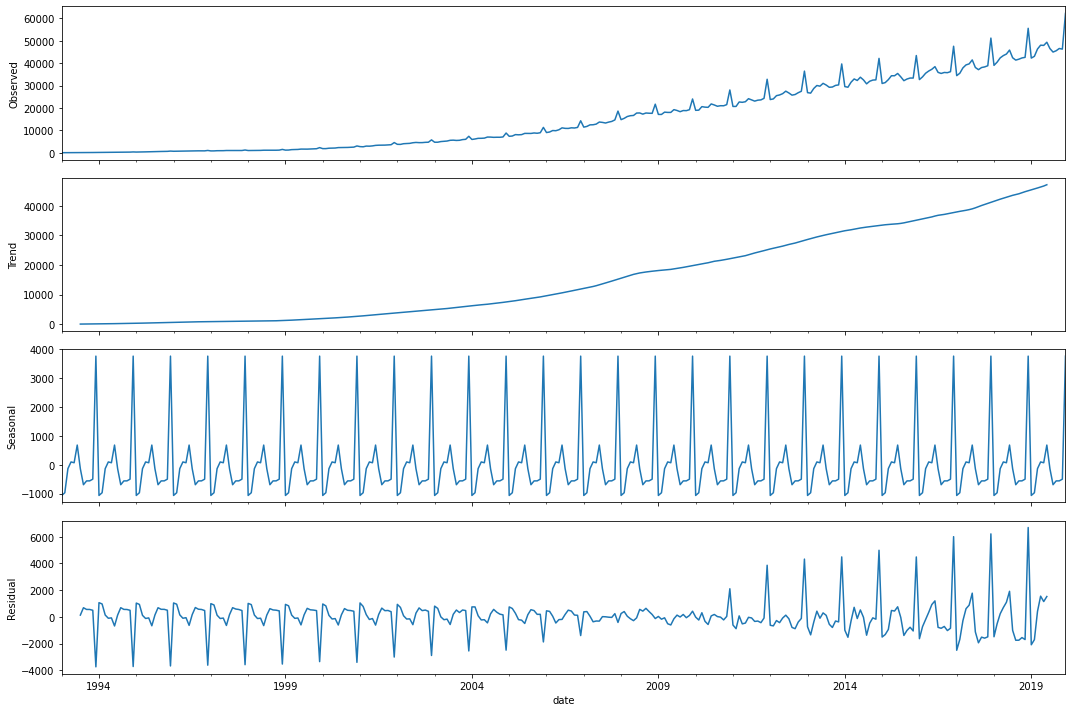

In [351]:
warnings.filterwarnings('ignore')

plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['avg_sal']).plot()
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['avg_sal'])[1])

# Уменьшение дисперсии

Оптимальный параметр преобразования Кокса- Бокса: 0.287953
 Критерий Дики-Фуллера: p=0.807940


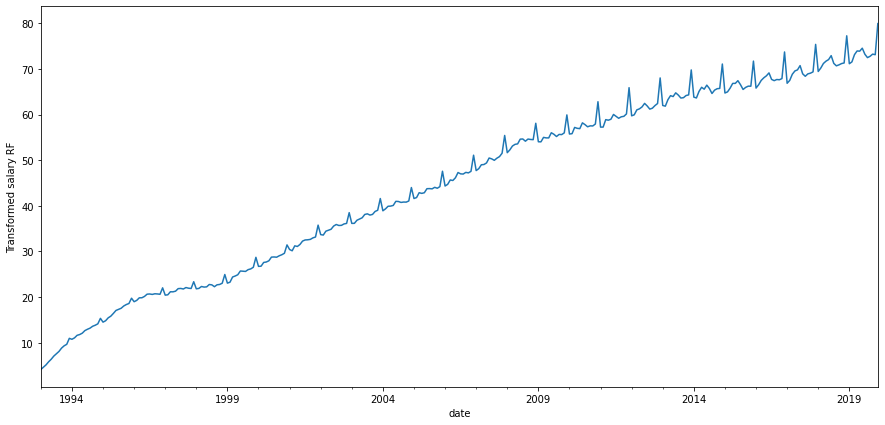

In [352]:
df['boxcox'], lmbda = stats.boxcox(df['avg_sal'])
plt.figure(figsize(15,7))
df['boxcox'].plot()
plt.ylabel(u'Transformed salary RF')
print("Оптимальный параметр преобразования Кокса- Бокса: %f" % lmbda)
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['boxcox'])[1])

# Декомпозиция, приведение к стационарному виду

 Критерий Дики-Фуллера: p=0.005780


<Figure size 1080x720 with 0 Axes>

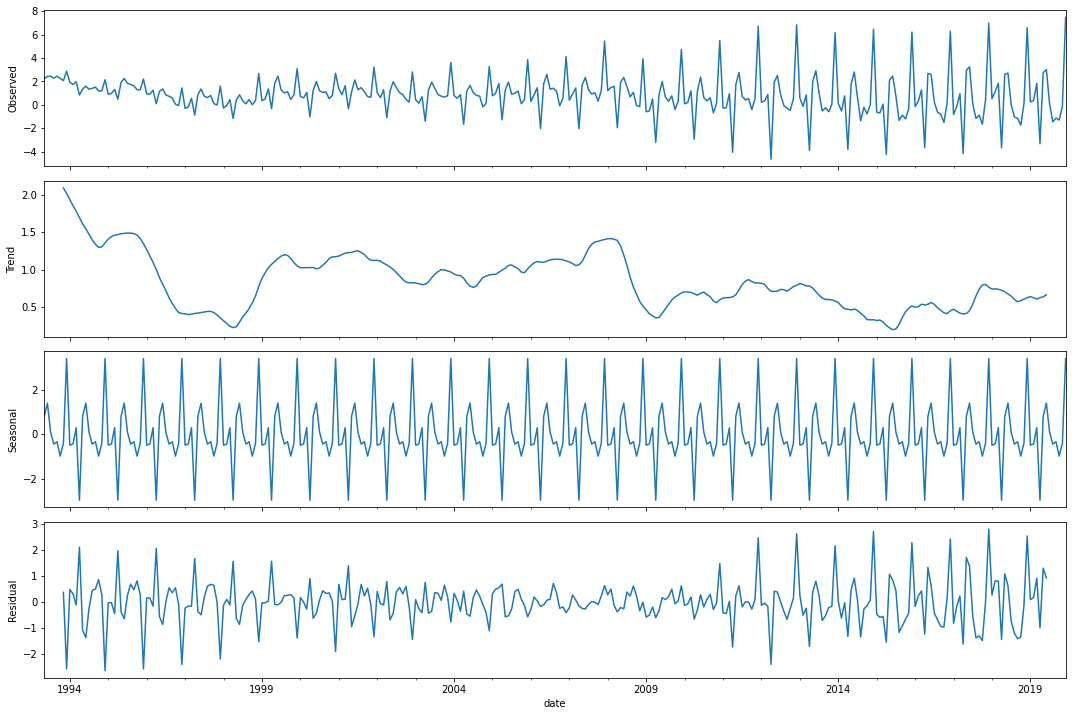

In [362]:
warnings.filterwarnings('ignore')

df['avg_sal_2'] = df['boxcox'] - df['boxcox'].shift(4)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['avg_sal_2'][4:]).plot()
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['avg_sal_2'][4:])[1])

In [363]:
df

,avg_sal,avg_sal12,avg_sal4,boxcox,avg_sal_2
date,,,,,
1993-01-01,15.3,59.291667,22.150,4.144736,NaN
1993-02-01,19.1,69.200000,27.700,4.647208,NaN
1993-03-01,23.6,79.666667,34.775,5.157247,NaN
1993-04-01,30.6,91.433333,42.875,5.827500,NaN
1993-05-01,37.5,103.175000,51.575,6.388315,2.243578
...,...,...,...,...,...
2019-08-01,44961.0,45891.083333,45834.000,72.468337,-1.457733
2019-09-01,45541.0,46205.000000,46589.750,72.749143,-1.128631
2019-10-01,46549.0,46556.416667,45890.000,73.231165,-1.300610


In [365]:
df.loc[df['avg_sal_2'].isna(), 'avg_sal_2'] = 2.243578
df

,avg_sal,avg_sal12,avg_sal4,boxcox,avg_sal_2
date,,,,,
1993-01-01,15.3,59.291667,22.150,4.144736,2.243578
1993-02-01,19.1,69.200000,27.700,4.647208,2.243578
1993-03-01,23.6,79.666667,34.775,5.157247,2.243578
1993-04-01,30.6,91.433333,42.875,5.827500,2.243578
1993-05-01,37.5,103.175000,51.575,6.388315,2.243578
...,...,...,...,...,...
2019-08-01,44961.0,45891.083333,45834.000,72.468337,-1.457733
2019-09-01,45541.0,46205.000000,46589.750,72.749143,-1.128631
2019-10-01,46549.0,46556.416667,45890.000,73.231165,-1.300610


# Подбор гипер-параметров

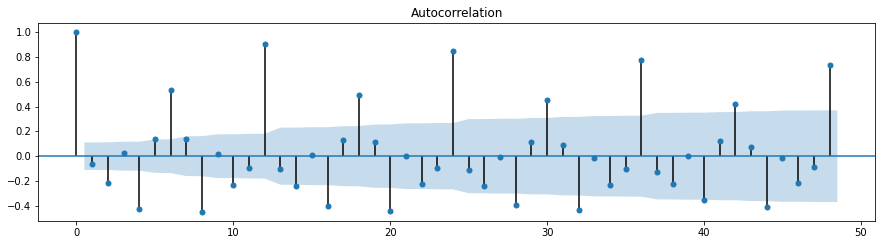

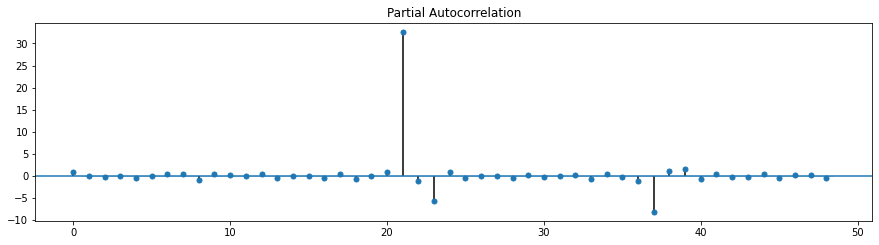

In [366]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['avg_sal_2'][13:].values.squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['avg_sal_2'][13:].values.squeeze(), lags=48, ax=ax)
pylab.show()

В автокоррекции номер последнего значимого сезонного лага Q = 4

Номер не сезонного значимого лага q = 8

В частичной автокоррекции номер последнего значимого сезонного лага P = 0

Номер не сезонного значимого лага p = 0

In [367]:
Qs = range(0, 5)
qs = range(0, 9)
Ps = range(0, 1)
ps = range(0, 1)
D = 1
d = 1

In [368]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

45

# Обучение модели

In [369]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучаетс¤
    try:
        model=sm.tsa.statespace.SARIMAX(df['avg_sal'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохран¤ем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

Wall time: 7min 31s


In [370]:
print('best aic: {}, best model: {}, best param: {}'.format(best_aic, best_model, best_param))

best aic: 4642.223919770492, best model: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000012EAA28D308>, best param: (0, 6, 0, 2)


# Остатки:

 Критерий —Стьюдента: p=0.428209
 Критерий Дики-Фуллера: p=0.000000


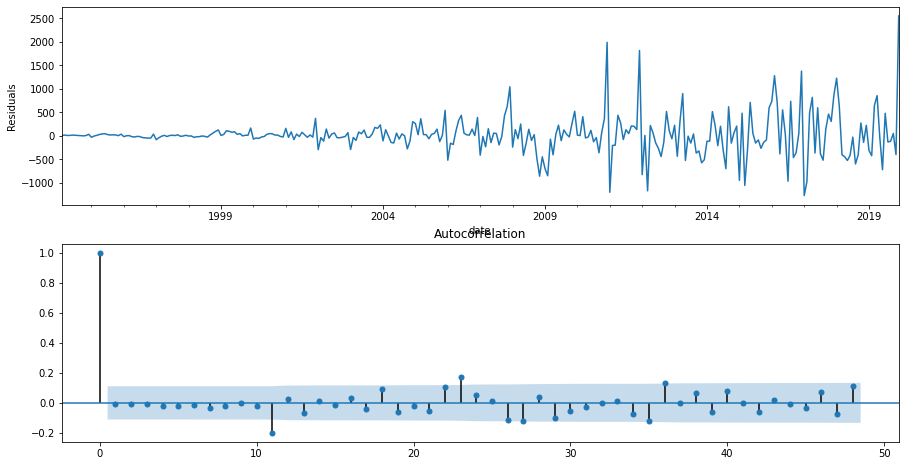

In [371]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print(" Критерий —Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

# Сравнение модели и данных

In [372]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

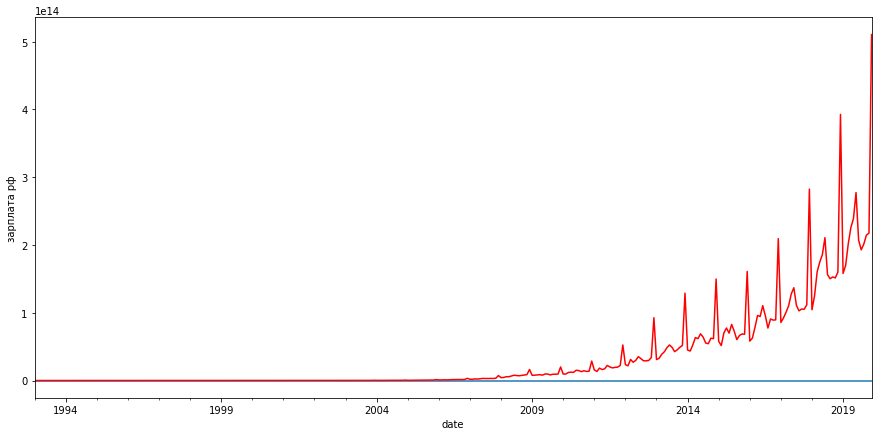

In [373]:
df['model'] = invboxcox(best_model.fittedvalues, lmbda)
plt.figure(figsize(15,7))
df['avg_sal'].plot()
df.model[0:].plot(color='r')
plt.ylabel('зарплата рф')
pylab.show()

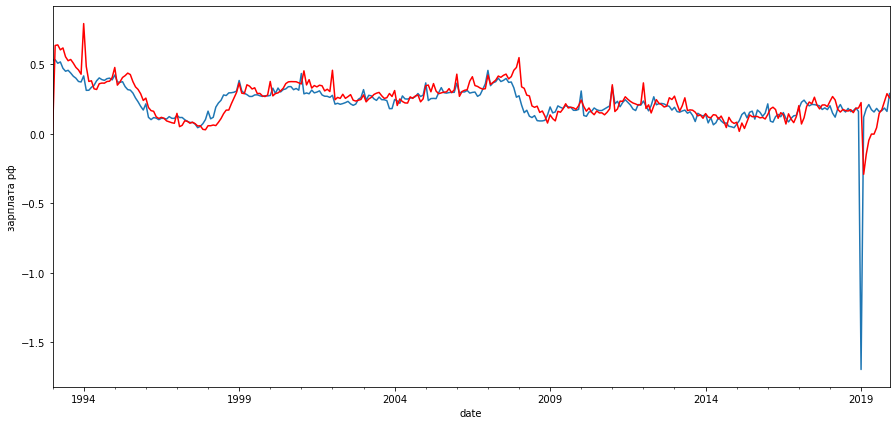

In [324]:
df['model'] = invboxcox(best_model.fittedvalues, lmbda)
df['model'] = df['model'] - 1
plt.figure(figsize(15,7))
df['avg_sal_2'].plot()
df.model[0:].plot(color='r')
plt.ylabel('зарплата рф')
pylab.show()

# Обучение моделей регрессии

In [395]:
df = pd.read_excel('avg_sal.xlsx', index_col = 'date')
df

,Unnamed: 0,avg_sal
date,,
1991-01-01,1991-01-01,0.308
1991-02-01,1991-02-01,0.294
1991-03-01,1991-03-01,0.337
1991-04-01,1991-04-01,0.373
1991-05-01,1991-05-01,0.438
...,...,...
2019-08-01,2019-08-01,44961.000
2019-09-01,2019-09-01,45541.000
2019-10-01,2019-10-01,46549.000


In [396]:
df["month"] = df.index.month
df['is_dec'] = df.month.isin([0, 12])*1
df.head(20)

,Unnamed: 0,avg_sal,month,is_dec
date,,,,
1991-01-01,1991-01-01,0.308,1,0
1991-02-01,1991-02-01,0.294,2,0
1991-03-01,1991-03-01,0.337,3,0
1991-04-01,1991-04-01,0.373,4,0
1991-05-01,1991-05-01,0.438,5,0
1991-06-01,1991-06-01,0.493,6,0
1991-07-01,1991-07-01,0.541,7,0
1991-08-01,1991-08-01,0.548,8,0
1991-09-01,1991-09-01,0.613,9,0


In [397]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [398]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

#     data.index = data.index.to_datetime()
#     data["hour"] = data.index.hour
    data["month"] = data.index.month
    data['is_dec'] = data.month.isin([0,12])*1

    # считаем средние только по тренировочной части, чтобы избежать лика
    data['month_average'] = list(map(code_mean(data[:test_index], 'month', "y").get, data.month))
#     data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "y").get, data.hour))

    # выкидываем закодированные средними признаки 
    data.drop(["month"], axis=1, inplace=True)

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

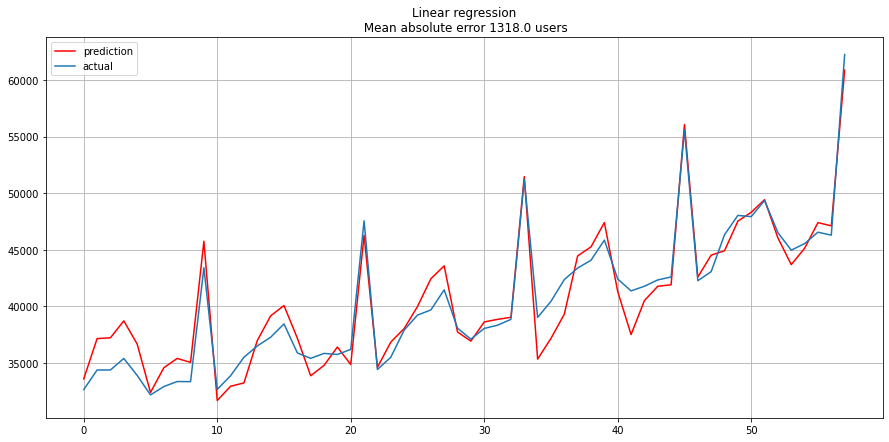

In [400]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = prepareData(df['avg_sal'], test_size=0.3, lag_start=12, lag_end=48)
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} rubles".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True);

In [401]:
import xgboost as xgb

def XGB_forecast(data, lag_start=5, lag_end=20, test_size=0.3, scale=1.96):

    # исходные данные
    X_train, X_test, y_train, y_test = prepareData(data['avg_sal'], lag_start, lag_end, test_size)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)

    # задаём параметры
    params = {
        'objective': 'reg:linear',
        'booster':'gblinear'
    }
    trees = 1500

    # прогоняем на кросс-валидации с метрикой rmse
    cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees)

    # обучаем xgboost с оптимальным числом деревьев, подобранным на кросс-валидации
    bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())

    # можно построить кривые валидации
    #cv.plot(y=['test-mae-mean', 'train-mae-mean'])

    # запоминаем ошибку на кросс-валидации
    deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]

    # посмотрим, как модель вела себя на тренировочном отрезке ряда
    prediction_train = bst.predict(dtrain)
    plt.figure(figsize=(15, 5))
    plt.plot(prediction_train, label='prediction')
    plt.plot(y_train, label='y_train')
    plt.axis('tight')
    plt.grid(True)

    # и на тестовом
    prediction_test = bst.predict(dtest)
    lower = prediction_test-scale*deviation
    upper = prediction_test+scale*deviation

    Anomalies = np.array([np.NaN]*len(y_test))
    Anomalies[y_test<lower] = y_test[y_test<lower]

    plt.figure(figsize=(15, 5))
    plt.plot(prediction_test, label="prediction")
    plt.plot(lower, "r--", label="upper bond / lower bond")
    plt.plot(upper, "r--")
    plt.plot(list(y_test), label="y_test")
    plt.plot(Anomalies, "ro", markersize=10)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("XGBoost Mean absolute error for money: {}".format(round(mean_absolute_error(prediction_test, y_test))))
    plt.grid(True)
    plt.legend

[20:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:16

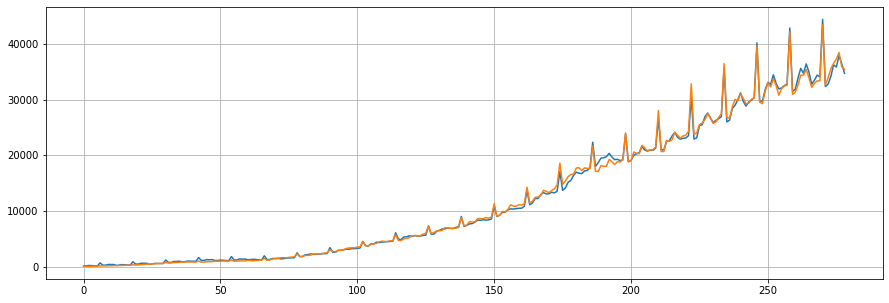

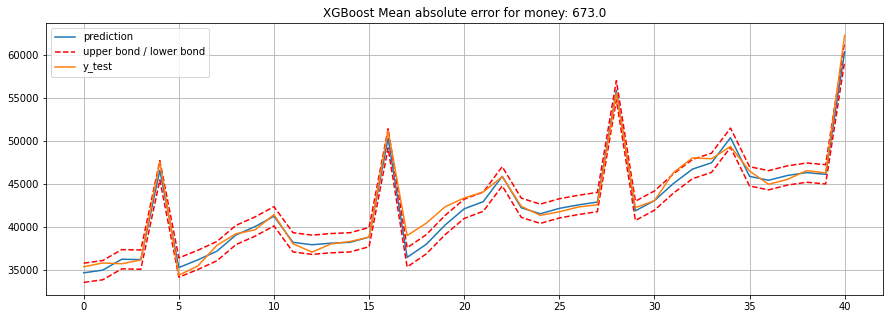

In [403]:
warnings.filterwarnings('ignore')
XGB_forecast(df, test_size=0.2, lag_start=5, lag_end=30)

# XGBoost справился лучше всех!